<a href="https://colab.research.google.com/github/HindujaJanarthanan/TNSDC/blob/main/DL_mini_sleep_apnea_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.stats import kurtosis, skew
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd

# Load CSV file
csv_data = pd.read_csv('/content/a01.csv')  # Replace 'your_data.csv' with your CSV file path

# Load TXT file (assuming labels are in a single column)
with open('/content/a01.txt', 'r') as file:
    txt_data = file.read().splitlines()
labels = np.array(txt_data)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.0091 - val_loss: 9.5065e-04
Epoch 2/50
1/1 [==============================] - 0s 58ms/step - loss: 0.0074 - val_loss: 0.0010
Epoch 3/50
1/1 [==============================] - 0s 82ms/step - loss: 0.0061 - val_loss: 0.0011
Epoch 4/50
1/1 [==============================] - 0s 86ms/step - loss: 0.0049 - val_loss: 0.0014
Epoch 5/50
1/1 [==============================] - 0s 68ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 6/50
1/1 [==============================] - 0s 60ms/step - loss: 0.0032 - val_loss: 0.0022
Epoch 7/50
1/1 [==============================] - 0s 73ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 8/50
1/1 [==============================] - 0s 81ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 9/50
1/1 [==============================] - 0s 70ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 10/50
1/1 [==============================] - 0s 55ms/step - loss: 6.6797e-04 - val_loss: 0.0057
Epoch 11/50
1/1 [======

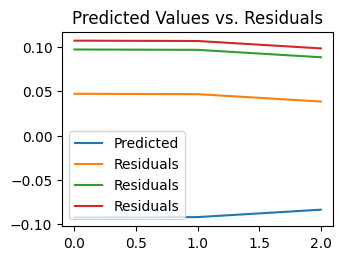

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from datetime import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample data with time
data = [
    ('0:00.000', -0.06), ('0:00.010', -0.065), ('0:00.020', -0.06),
    ('0:00.030', -0.075), ('0:00.040', -0.065), ('0:00.050', -0.07),
    ('0:00.060', -0.07), ('0:00.070', -0.09), ('0:00.080', -0.08),
    ('0:00.090', -0.095), ('0:00.100', -0.08), ('0:00.110', -0.095),
    ('0:00.120', -0.08), ('0:00.130', -0.095), ('0:00.140', -0.085),
    ('0:00.150', -0.09), ('0:00.160', -0.09), ('0:00.170', -0.1),
    ('0:00.180', -0.085), ('0:00.190', -0.105), ('0:00.200', -0.09),
    ('0:00.210', -0.045), ('0:00.220', 0.005), ('0:00.230', 0.015)
]

# Convert data to a DataFrame
df = pd.DataFrame(data, columns=['Time', 'Value'])

# Function to create sequences and labels from data
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length, 1].astype(np.float32)  # Extract and convert to float32
        label = data[i + sequence_length][1].astype(np.float32)  # Extract and convert to float32
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Convert time strings to numerical representations
time_format = "%M:%S.%f"
df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x, time_format).timestamp())

# Hyperparameters
sequence_length = 10
batch_size = 1

# Create sequences and labels
sequences, labels = create_sequences(df.values, sequence_length)

# Split the data into training and validation sets
split_index = int(0.8 * len(sequences))
x_train, y_train = sequences[:split_index], labels[:split_index]
x_val, y_val = sequences[split_index:], labels[split_index:]

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape input data to match the RNN input shape
x_train = x_train.reshape(-1, sequence_length, 1)
x_val = x_val.reshape(-1, sequence_length, 1)

# Train the model
model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Evaluate the model
loss = model.evaluate(x_val, y_val)
print("Validation Loss:", loss)

# Make predictions on the validation set
y_pred = model.predict(x_val)

plt.subplot(2, 2, 4)
plt.plot(y_pred, label='Predicted')
plt.plot(y_val - y_pred, label='Residuals')
plt.title('Predicted Values vs. Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print("Validation MAE:", mae)

Validation MAE: 0.07411073


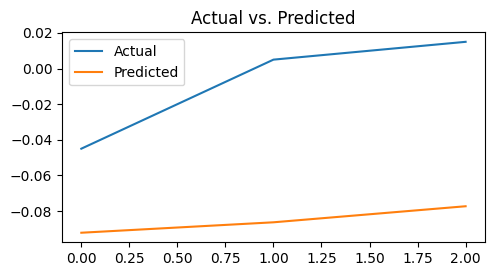

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(y_val, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()

In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 0.07631981


Text(0, 0.5, 'Frequency')

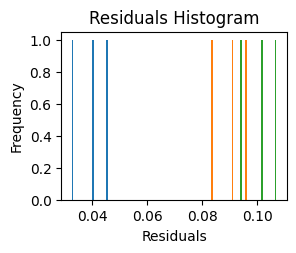

In [ ]:
plt.subplot(2, 2, 3)
plt.hist(y_val - y_pred, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

In [ ]:
# Calculate R-squared (R2)
r2 = r2_score(y_val, y_pred)
print("Validation R-squared (R2):", r2)

Validation R-squared (R2): -7.4552276696296715


Text(0.5, 1.0, 'Actual vs. Predicted (Scatter)')

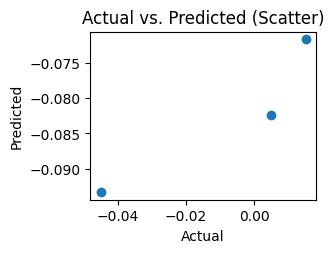

In [ ]:
plt.subplot(2, 2, 2)
plt.scatter(y_val, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Scatter)')